## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/cindyzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


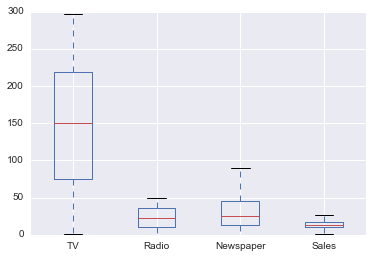

In [2]:
a = df.boxplot()
plt.show(a)


### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

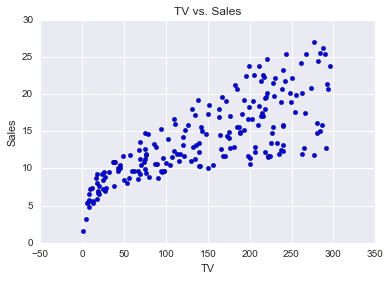

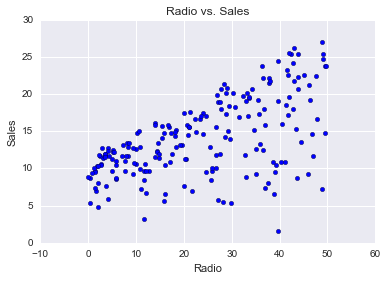

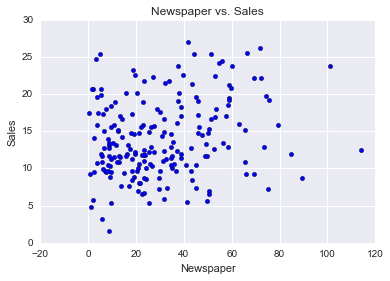

In [35]:
Fig1 = plt.scatter(df['TV'],df['Sales'])
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show(Fig1)

Fig2 = plt.scatter(df['Radio'],df['Sales'])
plt.title('Radio vs. Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show(Fig2)

Fig3 = plt.scatter(df['Newspaper'],df['Sales'])
plt.title('Newspaper vs. Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab5e0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b3dc5f8>]], dtype=object)

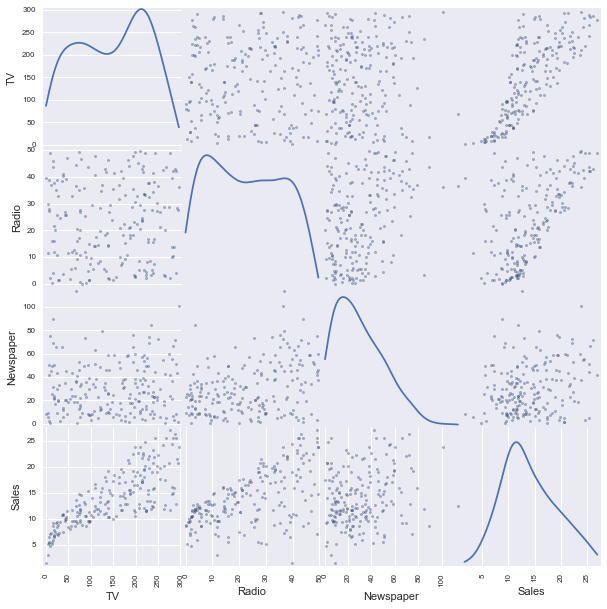

In [4]:
from pandas.tools.plotting import scatter_matrix 

scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='kde')


Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y = df['Sales']

b) Set X to be just the features described above in df

In [7]:
X = df[['TV','Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

d) Train model on training data, and make predictions on testing data

In [28]:
import numpy as np

regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [30]:
print("Mean Square Error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean Square Error: 1.99
Variance score: 0.89


Answer: Linear Regression is a good model. The mean square error is relatively small, and the variance score is closed to 1, which is a good sign.

#### f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

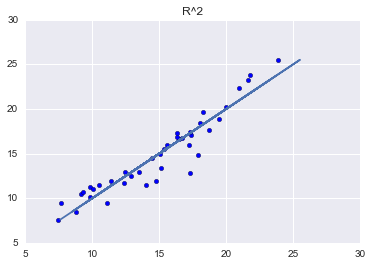

In [11]:
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

Answer: We can see that it's a pretty good model just by looking at the plot, and the mean square error and the variance score also suggest that the model is a good prediction of the data.

#### g) Can you measure the importance of features in this model? What is something you should check before making conclusions?
#### Try looking at LinearRegression().coef_

In [12]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.0468431   0.17854434  0.00258619]


Answer: The importance of features cannot be measured directly from the coefficients we got from the linear regression model because the scale of the variables might be different. Instead, we should standardize the coefficients by multiplying the standard deviation of the predictor variable (X), and dividing the standard deviation of the outcome variable (y). After we get the standardized regression coefficient, we can interprete its relation with the importance of features.

#### h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Answer: To measure the importance of the feature, we should calculate the standardized regression coefficients from the coefficients we got from the model above. For regression coefficient n, standardized regression coefficient = n * (std_dev [X]/std_dev [y]). The greater the standardized regression coefficient, the more important the feature.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

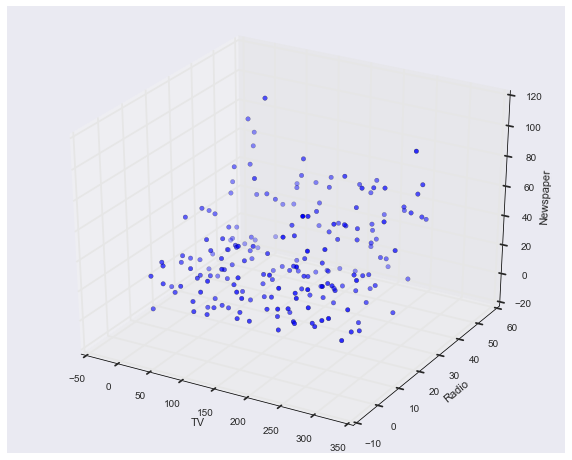

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = df['TV']
y = df['Radio']
z = df['Newspaper']

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

plt.show()

I used the Gaussian Processes model, which is a nonparametric model, to train the data. RSS and variance score are calculated, and a scatter plot of predictions vs the actual values on the testing data is made.

Mean Square Error: 0.17
Variance score: 0.99


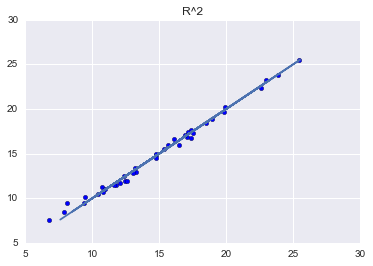

In [31]:
from sklearn import gaussian_process
gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1, nugget=0.0001)
gp.fit(X_train, y_train)  

print("Mean Square Error: %.2f" % np.mean((gp.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % gp.score(X_test, y_test))

plt.title('R^2')
plt.scatter(gp.predict(X_test),y_test)
plt.plot(y_test,y_test)

By comparing the mean square error and the variance score of the Gaussian Processes Model and the Linear Regression Model, I found that the mean square error of GPM is smaller and the variance score of it is closer to 1, which suggest that GPM is a better fit of the data and a better prediction.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


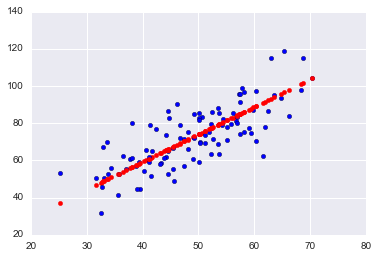

In [14]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../APMA4990/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Answer: By changing the learning rate, I found that if the learning rate is greater than 0.0001, it doesn't converge no matter how long we run the program; if the learning rate is smaller than 0.00001, it takes longer to converge, which means it needs to be runned for more than 100 interations to converge. Learning rate is essentially the size of the steps to approach the minimum point. If learning rate is too large, the step is so large that it skips the minimum point, thus it can't converge; if learning rate is too small, the step is so small that it takes too many iterations to get to the minimum point, which means the convergence time it takes is too long.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


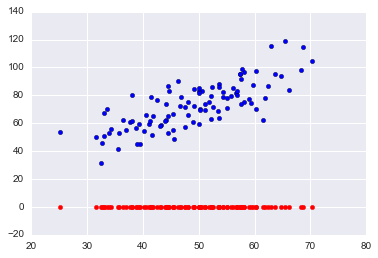

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


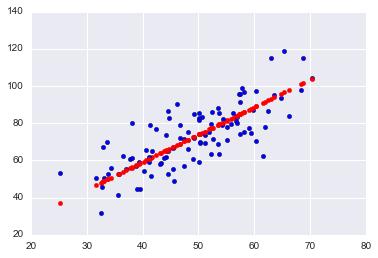

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 20 iterations b = 0.030269517287775917, m = 1.478895662279729, error = 112.64994426496074


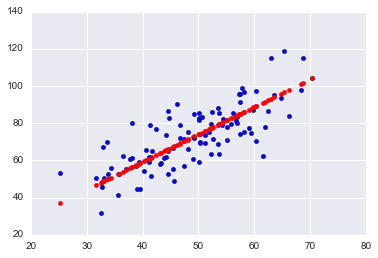

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 30 iterations b = 0.03087038348759943, m = 1.4788853558914152, error = 112.64958311652931


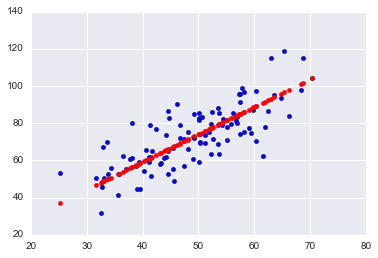

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 40 iterations b = 0.03147117483063245, m = 1.4788735490369667, error = 112.64922202825228


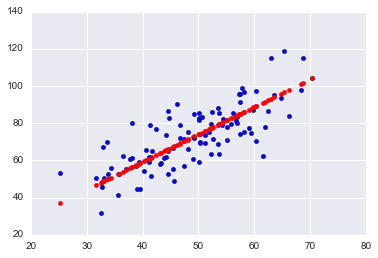

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 50 iterations b = 0.03207192079925886, m = 1.4788617415595229, error = 112.64886099447925


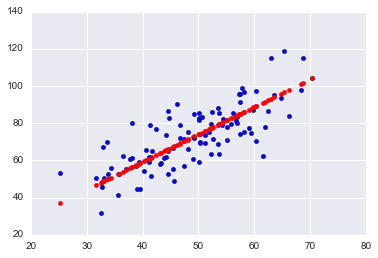

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 60 iterations b = 0.03267262142663274, m = 1.4788499349717201, error = 112.64850001520203


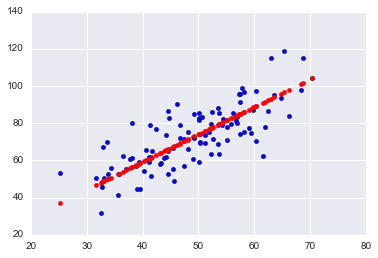

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 70 iterations b = 0.033273276716206224, m = 1.4788381292750161, error = 112.64813909041263


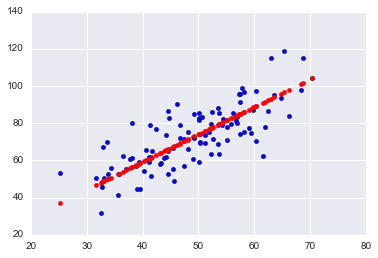

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 80 iterations b = 0.03387388667140119, m = 1.4788263244693456, error = 112.64777822010262


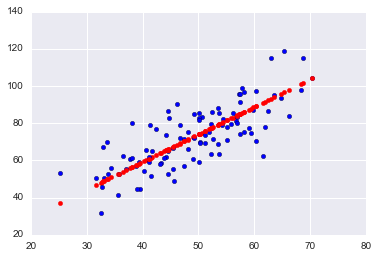

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 90 iterations b = 0.034474451295639266, m = 1.4788145205546412, error = 112.64741740426382


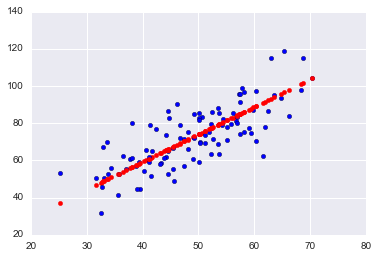

In [15]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,100,10):
    run(num)
    plt.show()


Answer: By increasing the number of interations, it can be visually observed that the prediction model is fitting the data better and better, which means RSS is converging to its minumum. When the learning rate is 0.0001, it takes only 10 iterations to reach the perfect prediction model; on the other hand, when the learning rate is 0.00001, it takes about 50 iterations to get to the same prediction model. Thus, the convergence rate increases as the learning rate increases, which also makes sense because larger learning rate means larger steps, and as a result the time to get to the minimum point will be shorter.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.